In [16]:
import re
import matplotlib.pyplot as plt
import numpy as np

# class Article:
#     def __init__(self, dictionary):
#         for i, j in dictionary.items():
#             setattr(self, i, j)

# class Node:
# 	def __init__(self, article=None, number=None, next=None):
# 		self.article = article
# 		self.number = number
# 		self.next = next
# 	def __str__(self):
# 		if self.next != None:
# 			return "[{}, {}] -> {}".format(self.article, self.number, self.next)
# 		else:
# 			return "[{}, {}]".format(self.article, self.number)
# 	def count(self):
# 		if self.next != None:
# 			return self.number + self.next.count()
# 		else:
# 			return self.number

# class LinkedList:
# 	def __init__(self, article, word):
# 		self.head = Node(article, 0)
# 		self.currentNode = self.head
# 		self.word = word
# 	def newNode(self, article):
# 		node = Node(article, 0)
# 		if self.head.article == None:
# 			self.head = node
# 			self.currentNode = node
# 		else:
# 			self.currentNode.next = node
# 			self.currentNode = node
# 	def show(self):
# 		print("[{}] -> {}".format(self.word, self.head))


In [17]:
# initialize variables
articles = []
keys = []
hashTable = {}
histogramNumbers = []

# read dataset
collection = open('uva_text.txt', 'r')
articles = collection.read()
collection.close()

# seperate articles into list
articles = re.sub('<doc>', ' ', articles)
articles = articles.split('</doc>')[:-1]

In [18]:
for i in range(len(articles)):
	# Seperate article items based on tags
	articles[i] = re.sub('<.?p>|</.*?>', ' ', articles[i])
	articles[i] = re.sub('\n', '', articles[i])
	articles[i] = re.sub('> ', ' <', articles[i])
	articles[i] = articles[i][2:]
	articles[i] = articles[i].split(' <')

	# Create Article object of article items
	tempDict = {}
	for j in range(0, len(articles[i]), 2):
		tempDict[articles[i][j]] = articles[i][j+1]
	articles[i] = Article(tempDict)

	# define what items of article are used
	tempWords = ""
	for j in vars(articles[i]).values():
		tempWords = tempWords + str(j)

	# lowercase and modify words to split into list
	keys.append(tempWords.lower())
	keys[i] = keys[i].replace("'s", "")
	keys[i] = keys[i].replace("' ", "")
	keys[i] = keys[i].replace(" '", "")
	keys[i] = re.sub(r'[;|-|_|:|<|>|(|)|+|/|*|"|?|!|.|,|(|)]', r'', keys[i])
	keys[i] = keys[i].split()

In [19]:
keys

[['la010189-0001',
  '1',
  'january',
  '1',
  '1989',
  'sunday',
  'home',
  'edition',
  'book',
  'review',
  'page',
  '1',
  'book',
  'review',
  'desk',
  '1206',
  'words',
  'new',
  'fallout',
  'from',
  'chernobyl',
  'the',
  'social',
  'impact',
  'of',
  'the',
  'chernobyl',
  'disaster',
  'by',
  'david',
  'r',
  'marples',
  'st',
  'martin',
  'press',
  '$35',
  'cloth',
  '$1495',
  'paper',
  '316',
  'pp',
  'illustrated',
  '0-312-02432-0',
  'by',
  'james',
  'e',
  'oberg',
  'oberg',
  'a',
  'space',
  'engineer',
  'in',
  'houston',
  'is',
  'the',
  'author',
  'of',
  'uncovering',
  'soviet',
  'disasters',
  'exploring',
  'the',
  'limits',
  'of',
  'glasnost',
  'random',
  'house',
  'the',
  'onset',
  'of',
  'the',
  'new',
  'gorbachev',
  'policy',
  'of',
  'glasnost',
  'commonly',
  'mistranslated',
  'as',
  'openness',
  'but',
  'closer',
  'in',
  'connotation',
  'to',
  'candor',
  'or',
  'publicizing',
  'has',
  'complicated

In [20]:
# create hashtable with the words as keys
for i in range(len(keys)):
	for word in keys[i]:
		articleNumber = i + 1
		if word not in hashTable.keys():
			hashTable[word] = LinkedList(articleNumber, word)
			hashTable[word].head.number += 1
		else:
			cursor = hashTable[word]
			if cursor.head.article == articleNumber:
				cursor.head.number += 1
			else:
				cursor = cursor.head
				while cursor.article != articleNumber:
					if cursor.next != None:
						cursor = cursor.next
					else:
						hashTable[word].newNode(articleNumber)
				cursor.number += 1

In [21]:

# print the hash table for each key and keep track of count for plot
for key in hashTable:
	hashTable[key].show()
	histogramNumbers.append(hashTable[key].head.count())

[la010189-0001] -> [1, 1]
[1] -> [1, 3] -> [2, 1] -> [3, 2]
[january] -> [1, 1] -> [2, 1] -> [3, 1]
[1989] -> [1, 1] -> [2, 1] -> [3, 3]
[sunday] -> [1, 1] -> [2, 1] -> [3, 1]
[home] -> [1, 1] -> [2, 1] -> [3, 2]
[edition] -> [1, 2] -> [2, 1] -> [3, 1]
[book] -> [1, 10] -> [2, 3]
[review] -> [1, 3] -> [2, 3]
[page] -> [1, 1] -> [2, 1] -> [3, 1]
[desk] -> [1, 1] -> [2, 1] -> [3, 1]
[1206] -> [1, 1]
[words] -> [1, 1] -> [2, 1] -> [3, 1]
[new] -> [1, 3] -> [3, 5]
[fallout] -> [1, 1]
[from] -> [1, 3] -> [2, 1]
[chernobyl] -> [1, 9]
[the] -> [1, 106] -> [2, 12] -> [3, 69]
[social] -> [1, 3] -> [3, 4]
[impact] -> [1, 2]
[of] -> [1, 64] -> [2, 6] -> [3, 54]
[disaster] -> [1, 5]
[by] -> [1, 8] -> [2, 4] -> [3, 9]
[david] -> [1, 2]
[r] -> [1, 2] -> [3, 1]
[marples] -> [1, 5]
[st] -> [1, 1]
[martin] -> [1, 1]
[press] -> [1, 2]
[$35] -> [1, 1]
[cloth] -> [1, 1]
[$1495] -> [1, 1]
[paper] -> [1, 1]
[316] -> [1, 1]
[pp] -> [1, 1]
[illustrated] -> [1, 1]
[0-312-02432-0] -> [1, 1]
[james] -> [1, 1] ->

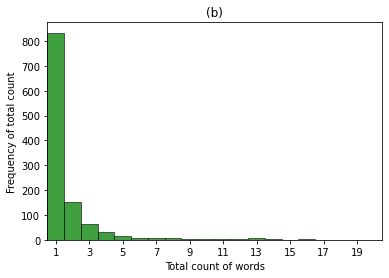

In [22]:
# plot histogram
bins = np.arange(max(histogramNumbers)) - 0.5
plt.hist(histogramNumbers, bins, alpha=0.75, color='g', linewidth=0.75, edgecolor='black')
plt.title("(b)")
plt.xlabel("Total count of words")
plt.ylabel("Frequency of total count")
x1,x2,y1,y2 = plt.axis()
plt.axis((1,21,y1,y2))
plt.xticks(np.arange(1, 20, 2))
plt.xlim([0.5, 20.5])
plt.show()